In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [2]:
inpath = "/sps/lsst/groups/clusters/cluster_comparison_project/after_matching/"
inpath1 = inpath + "cosmoDC2_amico.cosmoDC2.fzb/magy_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
inpath2 = inpath + "cosmoDC2_amico.DC2.fzb.magy/DC2.masked_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
outpath = "/sps/lsst/users/namourou/web/desc/cluster_comparison_project/amico.DC2.fzb/magy/amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy"
#outpath1 = outpath + "amico.cosmoDC2.fzb/magy/"
#outpath2 = outpath + "amico.DC2.fzb/magy/"
#outpathvs = outpath + "amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"

In [3]:
amcdc = Table.read(inpath1 + "output_catalog_12.fits")
amdc = Table.read(inpath2 + "output_catalog_12.fits")
c1cdc = Table.read(inpath1 + "cosmoDC2.v0.fits")
c2cdc = Table.read(inpath1 + "amico.cosmoDC2.fzb.magy.fits")
c1dc = Table.read(inpath2 + "cosmoDC2.DC2.masked.fits")
c2dc = Table.read(inpath2 + "amico.DC2.fzb.magy.v0.fits")

## Completeness & Purity (mean)

In [4]:
n_cl_matched_cdc = len(amcdc[amcdc["cat1_z_cl"]<=2])
comp1 = n_cl_matched_cdc/len(c1cdc[c1cdc["z_cl"]<=2])
pur1 = len(amcdc[amcdc["cat2_z_cl"]<=2])/len(c2cdc[c2cdc["z_cl"]<=2])
comp1_c = len(amcdc[(amcdc["cat1_z_cl"]<=2)*(amcdc["cat2_snr_cl"]>=3.5)])/len(c1cdc[c1cdc["z_cl"]<=2])
pur1_c = len(amcdc[(amcdc["cat2_z_cl"]<=2)*(amcdc["cat2_snr_cl"]>=3.5)])/len(c2cdc[(c2cdc["z_cl"]<=2)*(c2cdc["snr_cl"]>=3.5)])

n_cl_matched_dc = len(amdc[amdc["cat1_z_cl"]<=2])
comp2 = n_cl_matched_dc/len(c1dc[c1dc["z_cl"]<=2])
pur2 = len(amdc[amdc["cat2_z_cl"]<=2])/len(c2dc[c2dc["z_cl"]<=2])
comp2_c = len(amdc[(amdc["cat1_z_cl"]<=2)*(amdc["cat2_snr_cl"]>=3.5)])/len(c1dc[c1dc["z_cl"]<=2])
pur2_c = len(amdc[(amdc["cat2_z_cl"]<=2)*(amdc["cat2_snr_cl"]>=3.5)])/len(c2dc[(c2dc["z_cl"]<=2)*(c2dc["snr_cl"]>=3.5)])
              
#print(f"For AMICO on cosmoDC2, n_cl_matched = {n_cl_matched_cdc}; completeness = {round(comp1,2)}; purity = {round(pur1,2)}.")
#print(f"\tIf SNR>=3.5, n_cl_matched = {len(amcdc[(amcdc['cat1_z_cl']<=2)*(amcdc['cat2_snr_cl']>=3.5)])}; completeness = {round(comp1_c,2)}; purity = {round(pur1_c,2)}.")
#print(f"For AMICO on DC2, n_cl_matched = {n_cl_matched_dc}; completeness = {round(comp2,2)}; purity = {round(pur2,2)}.")
#print(f"\tIf SNR>=3.5, n_cl_matched = {len(amdc[(amdc['cat1_z_cl']<=2)*(amdc['cat2_snr_cl']>=3.5)])}; completeness = {round(comp2_c,2)}; purity = {round(pur2_c,2)}.")

In [5]:
names = ["AMICO_cosmoDC2", "AMICO_cosmoDC2", "AMICO_DC2", "AMICO_DC2"]
snr_cuts = [3,3.5,3,3.5]
n_cl_matched = [n_cl_matched_cdc, len(amcdc[(amcdc["cat1_z_cl"]<=2)*(amcdc["cat2_snr_cl"]>=3.5)]), n_cl_matched_dc, len(amdc[(amdc["cat1_z_cl"]<=2)*(amdc["cat2_snr_cl"]>=3.5)])]
completeness = [round(comp1,2), round(comp1_c,2), round(comp2,2), round(comp2_c,2)]
purity = [round(pur1,2), round(pur1_c,2), round(pur2,2), round(pur2_c,2)]

In [6]:
sumary = {"name" : names, "SNR_cut" : snr_cuts, "n_cl_matched": n_cl_matched, "completeness" : completeness, "purity" : purity}
sumary = Table(sumary)
display(sumary)

<Table length=4>
     name      SNR_cut n_cl_matched completeness  purity
    str14      float64    int64       float64    float64
-------------- ------- ------------ ------------ -------
AMICO_cosmoDC2     3.0       131096         0.33    0.79
AMICO_cosmoDC2     3.5        74816         0.19    0.87
     AMICO_DC2     3.0        61977         0.22    0.83
     AMICO_DC2     3.5        30875         0.11    0.91

## Distributions

### Redshift

In [7]:
amcdc = amcdc[amcdc["cat1_z_cl"]<=2]
amdc = amdc[amdc["cat1_z_cl"]<=2]

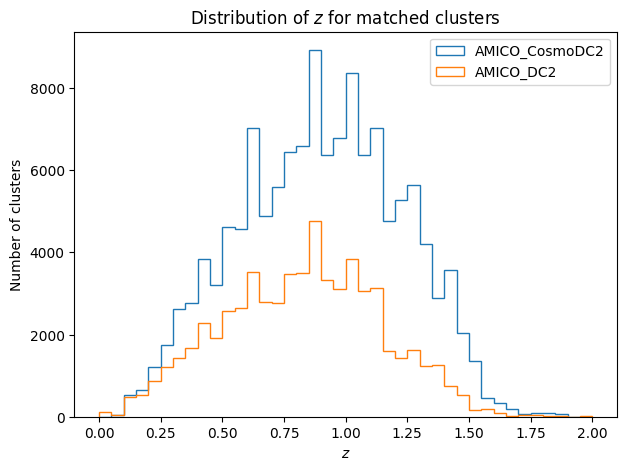

In [8]:
plt.figure(figsize = [7,5])
plt.hist(amcdc["cat2_z_cl"], bins = np.linspace(0,2.0,41), histtype = 'step', label = "AMICO_CosmoDC2")
plt.hist(amdc["cat2_z_cl"], bins = np.linspace(0,2.0,41), histtype = 'step', label = "AMICO_DC2")
plt.legend()
plt.xlabel("$z$")
plt.ylabel("Number of clusters")
plt.title("Distribution of $z$ for matched clusters")
plt.show()

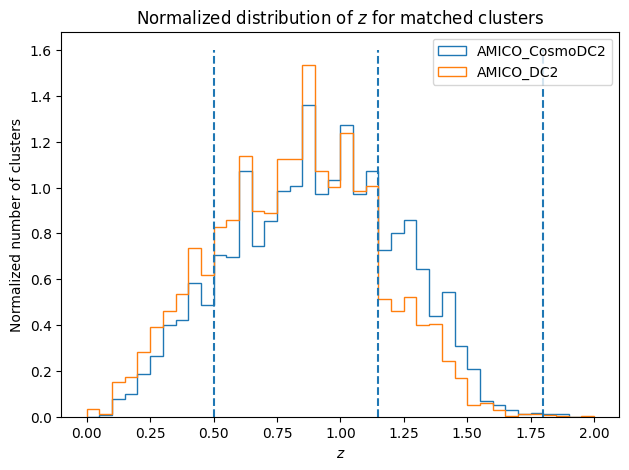

In [9]:
plt.figure(figsize = [7.2,5])
plt.hist(amcdc["cat2_z_cl"], bins = np.linspace(0,2.0,41), histtype = 'step', label = "AMICO_CosmoDC2", density = True)
plt.hist(amdc["cat2_z_cl"], bins = np.linspace(0,2.0,41), histtype = 'step', label = "AMICO_DC2", density = True)
plt.legend()
plt.xlabel("$z$")
plt.ylabel("Normalized number of clusters")
plt.title("Normalized distribution of $z$ for matched clusters")
plt.vlines(0.5,0,1.6, linestyle = '--')
#plt.vlines(0.8,0,1.6, linestyle = '--')
plt.vlines(1.15,0,1.6, linestyle = '--')
plt.vlines(1.8,0,1.6, linestyle = '--')
plt.show()

### SNR

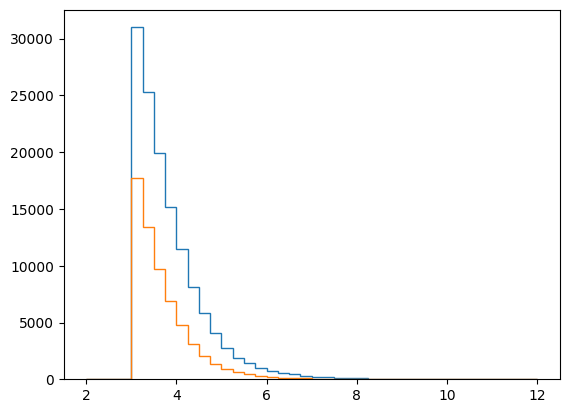

In [10]:
plt.hist(amcdc["cat2_snr_cl"], bins = np.linspace(2,12,41), histtype = 'step')
plt.hist(amdc["cat2_snr_cl"], bins = np.linspace(2,12,41), histtype = 'step')
plt.show()

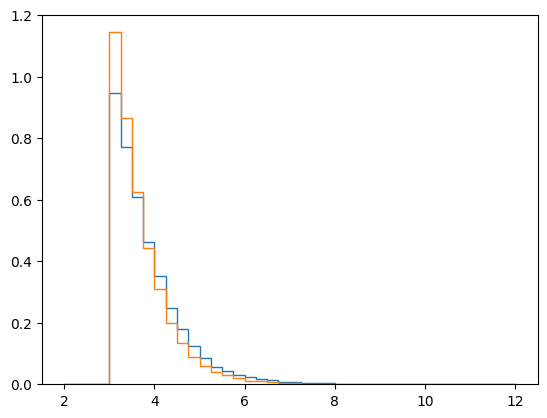

In [11]:
plt.hist(amcdc["cat2_snr_cl"], bins = np.linspace(2,12,41), histtype = 'step', density = True)
plt.hist(amdc["cat2_snr_cl"], bins = np.linspace(2,12,41), histtype = 'step', density = True)
plt.show()

## Delta z vs z

In [12]:
delt_z1 = (amcdc["cat2_z_cl"] - amcdc["cat1_z_cl"])/(1+amcdc["cat1_z_cl"])
delt_z2 = (amdc["cat2_z_cl"] - amdc["cat1_z_cl"])/(1+amdc["cat1_z_cl"])

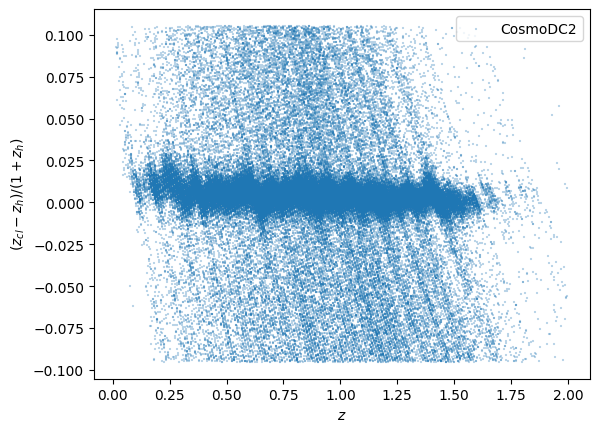

In [13]:
plt.scatter(amcdc["cat1_z_cl"], delt_z1, s = 1, alpha = .3, marker = '+', label = 'CosmoDC2')
plt.ylabel("$(z_{cl}-z_{h})/(1+z_h)$")
plt.xlabel("$z$")
plt.legend()
plt.savefig(outpath + "delt_z_vs_z_cosmodc2.png")

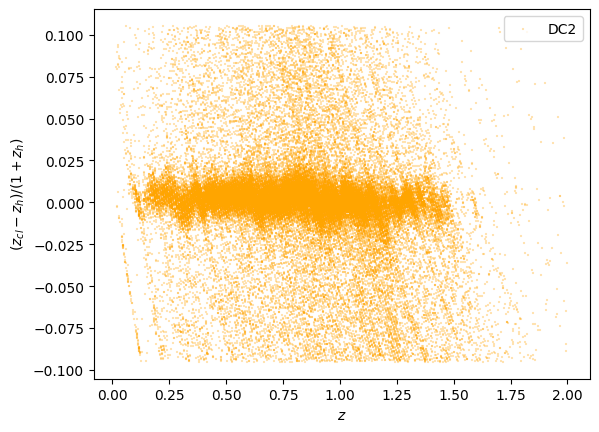

In [14]:
plt.scatter(amdc["cat1_z_cl"], delt_z2, s = 1, alpha = .3, marker = '+', label = 'DC2', c = 'orange')
plt.ylabel("$(z_{cl}-z_{h})/(1+z_h)$")
plt.xlabel("$z$")
plt.legend()
plt.savefig(outpath + "delt_z_vs_z_dc2.png")

Text(0.5, 0, '$(z_{cl}-z_{h})/(1+z_h)$')

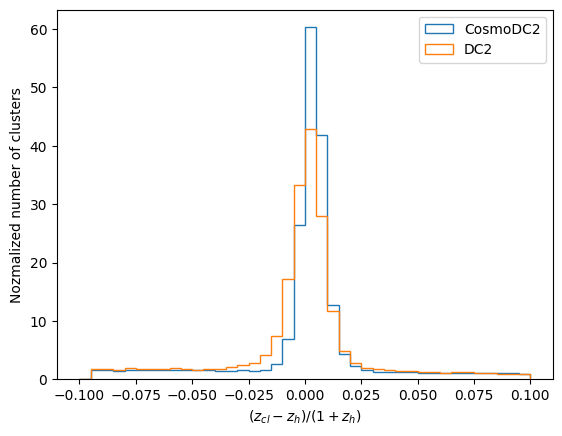

In [15]:
plt.hist(delt_z1, bins = np.linspace(-0.1,0.1,41), label = 'CosmoDC2', histtype = 'step', density = True)
plt.hist(delt_z2, bins = np.linspace(-0.1,0.1,41), label = 'DC2', histtype = 'step', density = True)
plt.legend()
plt.ylabel("Nozmalized number of clusters")
plt.xlabel("$(z_{cl}-z_{h})/(1+z_h)$")
#plt.savefig(outpath + "delt_z_hist.png")

Text(0.5, 0, '$(z_{cl}-z_{h})/(1+z_h)$')

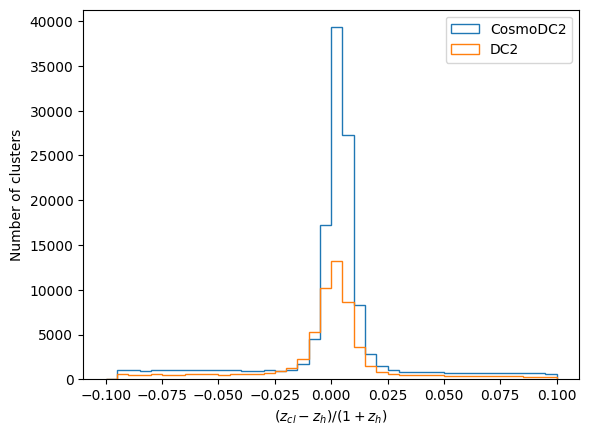

In [16]:
plt.hist(delt_z1, bins = np.linspace(-0.1,0.1,41), label = 'CosmoDC2', histtype = 'step')#, density = True)
plt.hist(delt_z2, bins = np.linspace(-0.1,0.1,41), label = 'DC2', histtype = 'step')#, density = True)
plt.legend()
plt.ylabel("Number of clusters")
plt.xlabel("$(z_{cl}-z_{h})/(1+z_h)$")
#plt.savefig(outpath + "delt_z_hist.png")

In [31]:
print(f"AMICO_cosmoDC2 : Δz/(1+z_h) = {round(np.mean(delt_z1),5)}")
print(f"AMICO_DC2 : Δz/(1+z_h) = {round(np.mean(delt_z2),5)}")

AMICO_cosmoDC2 : Δz/(1+z_h) = 0.00188
AMICO_DC2 : Δz/(1+z_h) = -0.00067


## Purity & Completeness

Text(0.5, 1.0, 'Completeness versus mass, redshift binned')

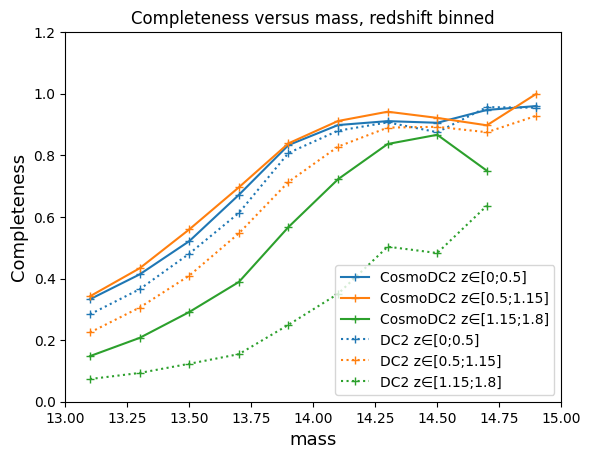

In [19]:
nbins_x = 11
bin1 = np.linspace(13, 15, nbins_x)
bin2 = [0,.5,1.15,1.8] #For AMICO
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
colors = ['#1f77b4', '#ff7f0e' , '#2ca02c']
plt.xlim(13,15)
nbins_x -= 1
bin_range = [min(bin1), max(bin1)]
compl_cdc = np.empty([len(bin2),nbins_x])
compl_dc = np.empty([len(bin2),nbins_x])
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
for i in range(0,len(bin2)-1):
    cut1 = bin2[i]
    cut2 = bin2[i+1]
    filter1_cdc = np.logical_and(amcdc["cat1_z_cl"] > cut1, amcdc["cat1_z_cl"] < cut2)
    filter2_cdc = np.logical_and(c1cdc["z_cl"] > cut1, c1cdc["z_cl"] < cut2)
    filter1_dc = np.logical_and(amdc["cat1_z_cl"] > cut1, amdc["cat1_z_cl"] < cut2)
    filter2_dc = np.logical_and(c1dc["z_cl"] > cut1, c1dc["z_cl"] < cut2)
    c_halos_matched_cdc = amcdc[filter1_cdc]
    c_halos_cdc = c1cdc[filter2_cdc]
    c_halos_matched_dc = amdc[filter1_dc]
    c_halos_dc = c1dc[filter2_dc]
    h_r_halos_matched_cdc = np.histogram(c_halos_matched_cdc["cat1_log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_halos_cdc  = np.histogram(c_halos_cdc["log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_halos_matched_dc = np.histogram(c_halos_matched_dc["cat1_log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_halos_dc  = np.histogram(c_halos_dc["log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    compl_cdc[i] = np.divide(h_r_halos_matched_cdc[0], h_r_halos_cdc[0], where=(h_r_halos_cdc[0]!=0))
    compl_dc[i] = np.divide(h_r_halos_matched_dc[0], h_r_halos_dc[0], where=(h_r_halos_dc[0]!=0))
    for j in range(len(compl_cdc[i])):
        if h_r_halos_matched_cdc[0][j]<2 or h_r_halos_cdc[0][j]<2:
            compl_cdc[i][j] = np.nan
        if h_r_halos_matched_dc[0][j]<2 or h_r_halos_dc[0][j]<2:
            compl_dc[i][j] = np.nan
    plt.ylim(0, 1.2)
    plt.xlabel('mass', fontsize = 13)
    plt.ylabel('Completeness', fontsize = 13)
    plt.plot(bin_x, compl_cdc[i], marker = '+', label = "CosmoDC2 " + labels[i], color = colors[i])
    plt.plot(bin_x, compl_dc[i], marker = '+', label = "DC2 " + labels[i], linestyle = "dotted", color = colors[i])

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.title("Completeness versus mass, redshift binned")

Text(0.5, 1.0, 'Purity versus $\\lambda^*$, redshift binned')

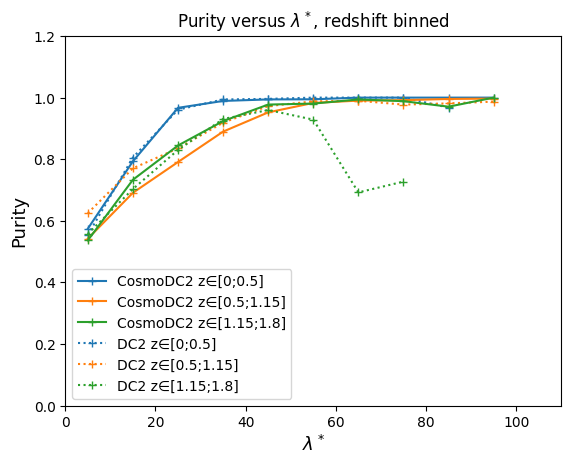

In [28]:
nbins_x = 11
bin1 = np.linspace(0, 100, nbins_x)
bin2 = [0,.5,1.15,1.8] #For AMICO
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
colors = ['#1f77b4', '#ff7f0e' , '#2ca02c']
nbins_x -= 1
bin_range = [min(bin1), max(bin1)]
purity_cdc = np.empty([len(bin2),nbins_x])
purity_dc = np.empty([len(bin2),nbins_x])
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
for i in range(0,len(bin2)-1):
    cut1 = bin2[i]
    cut2 = bin2[i+1]
    filter1_cdc = np.logical_and(amcdc["cat2_z_cl"] > cut1, amcdc["cat2_z_cl"] < cut2)
    filter2_cdc = np.logical_and(c2cdc["z_cl"] > cut1, c2cdc["z_cl"] < cut2)
    filter1_dc = np.logical_and(amdc["cat2_z_cl"] > cut1, amdc["cat2_z_cl"] < cut2)
    filter2_dc = np.logical_and(c2dc["z_cl"] > cut1, c2dc["z_cl"] < cut2)
    c_clusters_matched_cdc = amcdc[filter1_cdc]
    c_clusters_cdc = c2cdc[filter2_cdc]
    c_clusters_matched_dc = amdc[filter1_dc]
    c_clusters_dc = c2dc[filter2_dc]
    h_r_clusters_matched_cdc = np.histogram(c_clusters_matched_cdc["cat2_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_clusters_cdc  = np.histogram(c_clusters_cdc["mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_clusters_matched_dc = np.histogram(c_clusters_matched_dc["cat2_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    h_r_clusters_dc  = np.histogram(c_clusters_dc["mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
    purity_cdc[i] = np.divide(h_r_clusters_matched_cdc[0], h_r_clusters_cdc[0], where=(h_r_clusters_cdc[0]!=0))
    purity_dc[i] = np.divide(h_r_clusters_matched_dc[0], h_r_clusters_dc[0], where=(h_r_clusters_dc[0]!=0))
    for j in range(len(purity_cdc[i])):
        if h_r_clusters_cdc[0][j]<10:
            purity_cdc[i][j] = np.nan
        if h_r_clusters_dc[0][j]<10: #Est-ce qu'on veut cdt il y en a - de 10 à matcher ou on en en matcher moins de 10 ?
            purity_dc[i][j] = np.nan
    plt.xlim(0,110)
    plt.ylim(0, 1.2)
    plt.xlabel('$\lambda^*$', fontsize = 13)
    plt.ylabel('Purity', fontsize = 13)
    plt.plot(bin_x, purity_cdc[i], marker = '+', label = "CosmoDC2 " + labels[i], color = colors[i])
    plt.plot(bin_x, purity_dc[i], marker = '+', label = "DC2 " + labels[i], linestyle = "dotted", color = colors[i])

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.title("Purity versus $\lambda^*$, redshift binned")

Text(0.5, 1.0, '$\\Delta$Completeness versus mass, redshift binned')

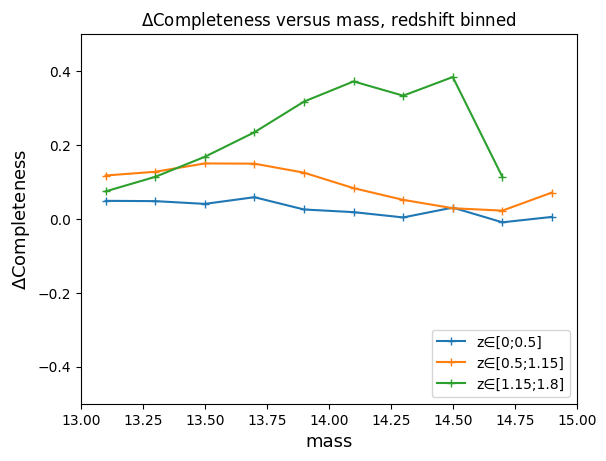

In [29]:
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
nbins_x = 11
bin1 = np.linspace(13, 15, nbins_x)
nbins_x-=1
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
delt_compl = compl_cdc - compl_dc
for i in range(0,len(bin2)-1):
    plt.xlim(13, 15)
    plt.ylim(-0.5, 0.5)
    plt.xlabel('mass', fontsize = 13)
    plt.ylabel('$\Delta$Completeness', fontsize = 13)
    plt.plot(bin_x, delt_compl[i], marker = '+', label =labels[i], color = colors[i])
plt.legend(loc = 'lower right')
plt.title("$\Delta$Completeness versus mass, redshift binned")

Text(0.5, 1.0, '$\\Delta$Purity versus $\\lambda^*$, redshift binned')

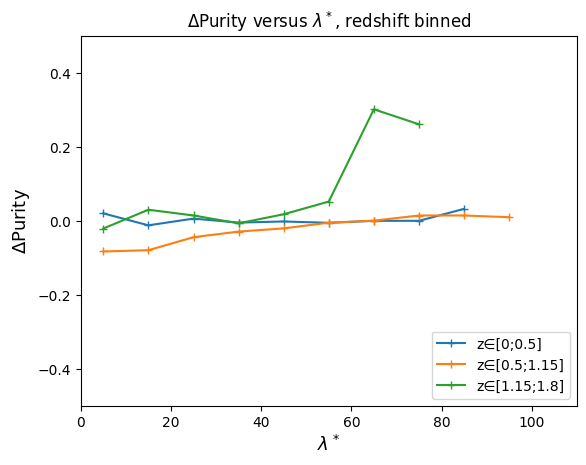

In [30]:
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
nbins_x = 11
bin1 = np.linspace(0, 100, nbins_x)
nbins_x-=1
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
delt_purity = purity_cdc - purity_dc
for i in range(0,len(bin2)-1):
    plt.xlim(0, 110)
    plt.ylim(-0.5, 0.5)
    plt.xlabel('$\lambda^*$', fontsize = 13)
    plt.ylabel('$\Delta$Purity', fontsize = 13)
    plt.plot(bin_x, delt_purity[i], marker = '+', label =labels[i], color = colors[i])
plt.legend(loc = 'lower right')
plt.title("$\Delta$Purity versus $\lambda^*$, redshift binned")

Text(0.5, 1.0, 'Complétude vs masse des halos')

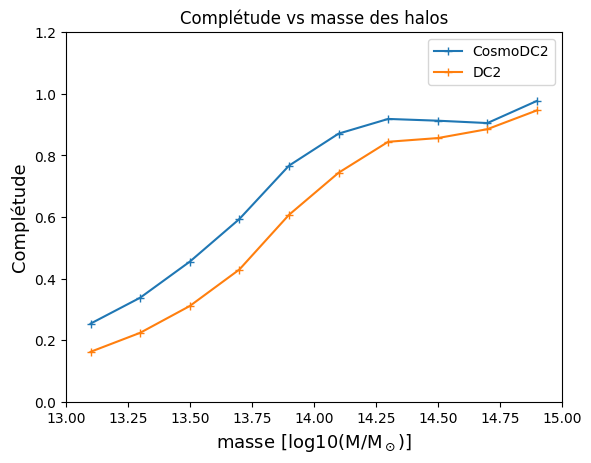

In [50]:
nbins_x = 11
bin1 = np.linspace(13, 15, nbins_x)
colors = ['#1f77b4', '#ff7f0e' , '#2ca02c']
plt.xlim(13,15)
nbins_x -= 1
bin_range = [min(bin1), max(bin1)]
compl_cdc = np.empty([len(bin2),nbins_x])
compl_dc = np.empty([len(bin2),nbins_x])
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])
cut2=1.8
filter1_cdc = amcdc["cat1_z_cl"] < cut2
filter2_cdc = c1cdc["z_cl"] < cut2
filter1_dc = amdc["cat1_z_cl"] < cut2
filter2_dc = c1dc["z_cl"] < cut2
c_halos_matched_cdc = amcdc[filter1_cdc]
c_halos_cdc = c1cdc[filter2_cdc]
c_halos_matched_dc = amdc[filter1_dc]
c_halos_dc = c1dc[filter2_dc]
h_r_halos_matched_cdc = np.histogram(c_halos_matched_cdc["cat1_log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_halos_cdc  = np.histogram(c_halos_cdc["log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_halos_matched_dc = np.histogram(c_halos_matched_dc["cat1_log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_halos_dc  = np.histogram(c_halos_dc["log10_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
compl_cdc_s = np.divide(h_r_halos_matched_cdc[0], h_r_halos_cdc[0], where=(h_r_halos_cdc[0]!=0))
compl_dc_s = np.divide(h_r_halos_matched_dc[0], h_r_halos_dc[0], where=(h_r_halos_dc[0]!=0))

if h_r_halos_matched_cdc[0][0]<2 or h_r_halos_cdc[0][0]<2:
    compl_cdc_s = np.nan
if h_r_halos_matched_dc[0][0]<2 or h_r_halos_dc[0][0]<2:
    compl_dc_s = np.nan
plt.ylim(0, 1.2)
plt.xlabel('masse [log10(M/M$_\odot$)]', fontsize = 13)
plt.ylabel('Complétude', fontsize = 13)
plt.plot(bin_x, compl_cdc_s, marker = '+', label = "CosmoDC2", color = colors[0])
plt.plot(bin_x, compl_dc_s, marker = '+', label = "DC2", color = colors[1])
plt.legend()
plt.title("Complétude vs masse des halos")

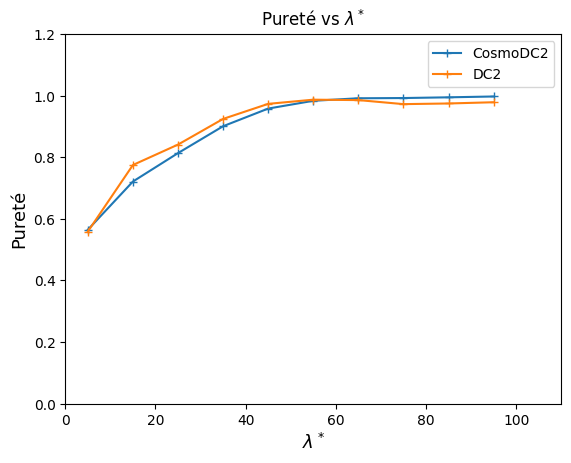

In [51]:
nbins_x = 11
bin1 = np.linspace(0, 100, nbins_x)
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
colors = ['#1f77b4', '#ff7f0e' , '#2ca02c']
nbins_x -= 1
bin_range = [min(bin1), max(bin1)]
purity_cdc_s = np.empty(nbins_x)
purity_dc_s = np.empty(nbins_x)
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
    bin_x[ix] = 0.5 * (bin1[ix] + bin1[ix+1])

cut2 = 1.8
filter1_cdc = amcdc["cat2_z_cl"] < cut2
filter2_cdc = c2cdc["z_cl"] < cut2
filter1_dc = amdc["cat2_z_cl"] < cut2
filter2_dc = c2dc["z_cl"] < cut2
c_clusters_matched_cdc = amcdc[filter1_cdc]
c_clusters_cdc = c2cdc[filter2_cdc]
c_clusters_matched_dc = amdc[filter1_dc]
c_clusters_dc = c2dc[filter2_dc]
h_r_clusters_matched_cdc = np.histogram(c_clusters_matched_cdc["cat2_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_clusters_cdc  = np.histogram(c_clusters_cdc["mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_clusters_matched_dc = np.histogram(c_clusters_matched_dc["cat2_mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
h_r_clusters_dc  = np.histogram(c_clusters_dc["mass"], bins=nbins_x, range=bin_range, weights=None, density=None)
purity_cdc_s = np.divide(h_r_clusters_matched_cdc[0], h_r_clusters_cdc[0], where=(h_r_clusters_cdc[0]!=0))
purity_dc_s = np.divide(h_r_clusters_matched_dc[0], h_r_clusters_dc[0], where=(h_r_clusters_dc[0]!=0))
for j in range(len(purity_cdc_s)):
    if h_r_clusters_cdc[0][j]<10:
        purity_cdc_s[j] = np.nan
    if h_r_clusters_dc[0][j]<10: #Est-ce qu'on veut cdt il y en a - de 10 à matcher ou on en en matcher moins de 10 ?
        purity_dc_s[j] = np.nan
plt.xlim(0,110)
plt.ylim(0, 1.2)
plt.xlabel('$\lambda^*$', fontsize = 13)
plt.ylabel('Pureté', fontsize = 13)
plt.plot(bin_x, purity_cdc_s, marker = '+', label = "CosmoDC2")
plt.plot(bin_x, purity_dc_s, marker = '+', label = "DC2")
plt.title("Pureté vs $\lambda^*$")
plt.legend()